In [1]:
import nltk
from nltk.corpus import gutenberg, brown, inaugural
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,7)
plt.rcParams["font.size"] = 13

# 1.1 Gutenberg corpus

In [2]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [3]:
emma = gutenberg.words("austen-emma.txt")
print(type(emma), len(emma))

<class 'nltk.corpus.reader.util.StreamBackedCorpusView'> 192427


Objects read from corpora must be converted to NLTK text class using `nltk.Text(corpus_obj)`

In [4]:
emma_txt =  nltk.Text(emma)
print(type(emma_txt))
emma_txt.concordance("surprize")

<class 'nltk.text.Text'>
Displaying 25 of 37 matches:
er father , was sometimes taken by surprize at his being still able to pity ` 
hem do the other any good ." " You surprize me ! Emma must do Harriet good : a
Knightley actually looked red with surprize and displeasure , as he stood up ,
r . Elton , and found to his great surprize , that Mr . Elton was actually on 
d aid ." Emma saw Mrs . Weston ' s surprize , and felt that it must be great ,
father was quite taken up with the surprize of so sudden a journey , and his f
y , in all the favouring warmth of surprize and conjecture . She was , moreove
he appeared , to have her share of surprize , introduction , and pleasure . Th
ir plans ; and it was an agreeable surprize to her , therefore , to perceive t
talking aunt had taken me quite by surprize , it must have been the death of m
f all the dialogue which ensued of surprize , and inquiry , and congratulation
 the present . They might chuse to surprize her ." Mrs . Cole had many to agr

## Print information about Gutenberg corpus

In [5]:
for fileid in gutenberg.fileids():
    num_chars = len(gutenberg.raw(fileid))
    num_words = len(gutenberg.words(fileid))
    num_sents = len(gutenberg.sents(fileid))
    num_vocab = len(set([w.lower() for w in gutenberg.words(fileid)]))
    print(
        round(num_chars / num_words),
        str(round(num_words / num_sents)).zfill(2),
        str(round(num_words / num_vocab)).zfill(2),
        fileid[:-4]
    )

5 25 26 austen-emma
5 26 17 austen-persuasion
5 28 22 austen-sense
4 34 79 bible-kjv
5 19 05 blake-poems
4 19 14 bryant-stories
4 18 12 burgess-busterbrown
4 20 13 carroll-alice
5 20 12 chesterton-ball
5 23 11 chesterton-brown
5 18 11 chesterton-thursday
4 21 25 edgeworth-parents
5 26 15 melville-moby_dick
5 52 11 milton-paradise
4 12 09 shakespeare-caesar
4 12 08 shakespeare-hamlet
4 12 07 shakespeare-macbeth
5 36 12 whitman-leaves


# 1.2 Web and chat text 

In [6]:
nltk.corpus.webtext.fileids()

['firefox.txt',
 'grail.txt',
 'overheard.txt',
 'pirates.txt',
 'singles.txt',
 'wine.txt']

In [7]:
nltk.corpus.nps_chat.fileids()

['10-19-20s_706posts.xml',
 '10-19-30s_705posts.xml',
 '10-19-40s_686posts.xml',
 '10-19-adults_706posts.xml',
 '10-24-40s_706posts.xml',
 '10-26-teens_706posts.xml',
 '11-06-adults_706posts.xml',
 '11-08-20s_705posts.xml',
 '11-08-40s_706posts.xml',
 '11-08-adults_705posts.xml',
 '11-08-teens_706posts.xml',
 '11-09-20s_706posts.xml',
 '11-09-40s_706posts.xml',
 '11-09-adults_706posts.xml',
 '11-09-teens_706posts.xml']

In [8]:
nltk.corpus.nps_chat.posts("10-19-20s_706posts.xml")

[['now', 'im', 'left', 'with', 'this', 'gay', 'name'], [':P'], ...]

## 1.3 Brown corpus

In [9]:
brown.categories()

['adventure',
 'belles_lettres',
 'editorial',
 'fiction',
 'government',
 'hobbies',
 'humor',
 'learned',
 'lore',
 'mystery',
 'news',
 'religion',
 'reviews',
 'romance',
 'science_fiction']

In [10]:
brown.words(fileids="cm01")

['Now', 'that', 'he', 'knew', 'himself', 'to', 'be', ...]

## Stylistics: comparing modal verbs in different genres

In [11]:
news_txt = brown.words(categories="news")
fdist_news = nltk.FreqDist([w.lower() for w in news_txt])
modals = "can could may might must will".split()

for m in modals:
    print(m.rjust(5) + ": " + str(fdist_news[m]).rjust(3))

  can:  94
could:  87
  may:  93
might:  38
 must:  53
 will: 389


In [12]:
religion_txt = brown.words(categories="religion")
fdist_religion = nltk.FreqDist([w.lower() for w in religion_txt])
wh_words = "what when where who why".split()

for m in wh_words:
    print(m.rjust(5) + ": " + str(fdist_religion[m]).rjust(3))

 what:  86
 when:  68
where:  21
  who: 102
  why:  20


## Conditional frequency distribution

(This is just a demonstration example; see 2.x below for more details)

In [13]:
cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

In [14]:
categories = ['news', 'religion']
cfd.tabulate(conditions = categories, samples = modals)

           can could   may might  must  will 
    news    93    86    66    38    50   389 
religion    82    59    78    12    54    71 


# 1.5 Inaugural address corpus

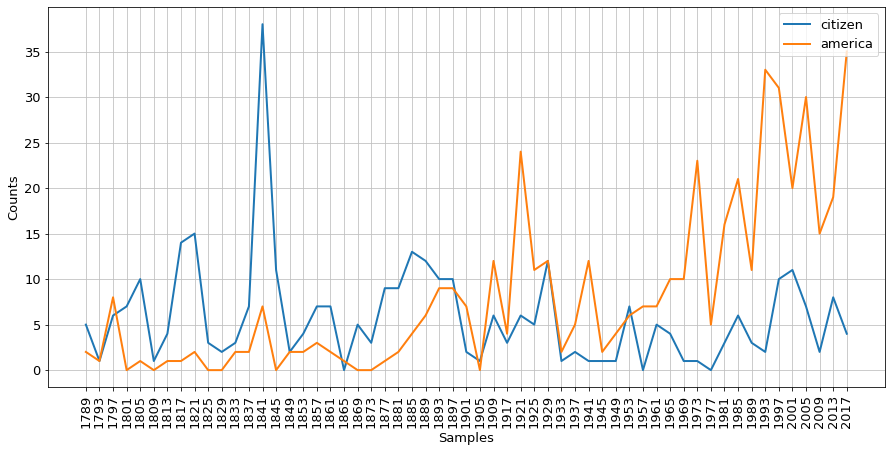

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [15]:
cfd_iac = nltk.ConditionalFreqDist(
    (target, fileid[:4])
    for fileid in inaugural.fileids()
    for w in inaugural.words(fileid)
    for target in ['america', 'citizen']
    if w.lower().startswith(target)
)

cfd_iac.plot()

# 1.8 Text corpus structure

## Basic corpus functionality

In [16]:
gutenberg.raw("burgess-busterbrown.txt")[:5]

'[The '

In [17]:
gutenberg.words("burgess-busterbrown.txt")[:5]

['[', 'The', 'Adventures', 'of', 'Buster']

In [18]:
gutenberg.sents("burgess-busterbrown.txt")[:5]

[['[',
  'The',
  'Adventures',
  'of',
  'Buster',
  'Bear',
  'by',
  'Thornton',
  'W',
  '.',
  'Burgess',
  '1920',
  ']'],
 ['I'],
 ['BUSTER', 'BEAR', 'GOES', 'FISHING'],
 ['Buster',
  'Bear',
  'yawned',
  'as',
  'he',
  'lay',
  'on',
  'his',
  'comfortable',
  'bed',
  'of',
  'leaves',
  'and',
  'watched',
  'the',
  'first',
  'early',
  'morning',
  'sunbeams',
  'creeping',
  'through',
  'the',
  'Green',
  'Forest',
  'to',
  'chase',
  'out',
  'the',
  'Black',
  'Shadows',
  '.'],
 ['Once',
  'more',
  'he',
  'yawned',
  ',',
  'and',
  'slowly',
  'got',
  'to',
  'his',
  'feet',
  'and',
  'shook',
  'himself',
  '.']]

# 1.9 Loading your own corpus

`nltk.corpus.PlaintextCorpusReader()` takes two arguments:
1. corpus directory
2. regex of file name(s)

In [19]:
nltk.corpus.PlaintextCorpusReader("./", "sample.txt").words()

['will', 'this', 'read', 'correctly', '?']

In [20]:
?nltk.corpus.BracketParseCorpusReader

# 2.1 Conditions and events

To make conditional frequency distributions, you need to process a sequence of pairs, where each pair is a two-tuple of **condition** and **event**.

- **Condition** is the grouping factor (e.g. genre: `["news", "romance"]`).
- **Event** is the word (which will be counted within each condition)

# 2.2 Counting words by genre

`nltk.ConditionalFreqDist()` has only one argument: a list of condition-event pairs (tuples)...

```python
[(cond1, ev1), (cond1, ev2), ...]
```

This is typically produced using a list comprehension.
```python
[
    (cond, event)
     for cond in list_of_conds 
     for event in list_of_events # (within each cond)
]
 
```

(The next example is the same as the one shown earlier.)

In [21]:
# square brackets are optional here
cfd = nltk.ConditionalFreqDist(
    (genre, word) 
    for genre in ['news', 'romance']
    for word in brown.words(categories=genre)
)

In [22]:
cfd['romance'].most_common(10)

[(',', 3899),
 ('.', 3736),
 ('the', 2758),
 ('and', 1776),
 ('to', 1502),
 ('a', 1335),
 ('of', 1186),
 ('``', 1045),
 ("''", 1044),
 ('was', 993)]

## CFD of inaugural address corpus

"This code generates the pair ('america', '1865') for every instance of a word whose lowercased form starts with america — such as Americans — in the file 1865-Lincoln.txt"

In [23]:
cfd_i = nltk.ConditionalFreqDist(
    (w, i[:4])
     for i in inaugural.fileids()
     for w in inaugural.words(fileids=i)
     for cond in ['america', 'citizen']
     if w.lower().startswith(cond)
)

In [24]:
cfd_i.tabulate(
    samples = ["2017"]
)

            2017 
    America   20 
   American   11 
Americanism    0 
  Americans    4 
  Americanâ    0 
   Americas    0 
   Citizens    0 
    citizen    0 
  citizenry    0 
   citizens    4 
citizenship    0 


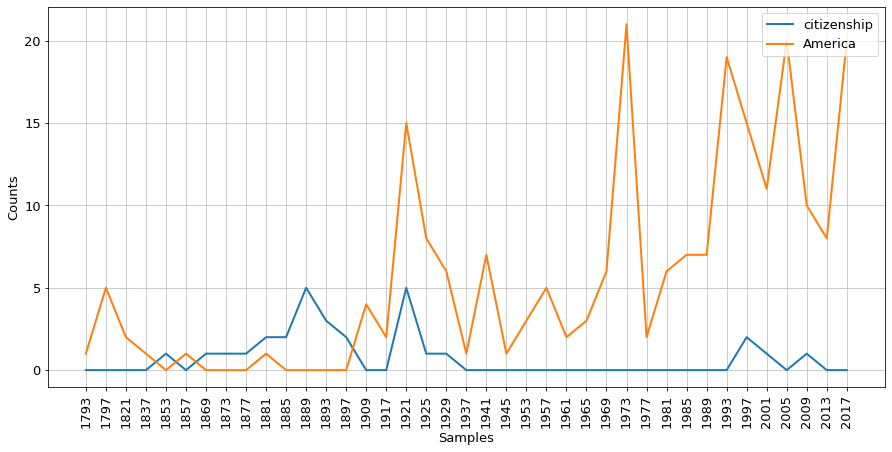

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [25]:
cfd_i.plot(
    conditions = ["citizenship", "America"]
)

## CFD of Brown corpus

Working with the **news** and **romance** genres from the Brown Corpus, find out which **days of the week** are most newsworthy, and which are most romantic. Define a variable called days containing a list of days of the week, i.e. ['Monday', ...]. Now tabulate the counts for these words using cfd.tabulate(samples=days). Now try the same thing using plot in place of tabulate. You may control the output order of days with the help of an extra parameter: samples=['Monday', ...].

           Friday    Monday  Saturday    Sunday  Thursday   Tuesday Wednesday 
   news        41        54        33        51        20        43        22 
romance         3         2         4         5         1         3         3 


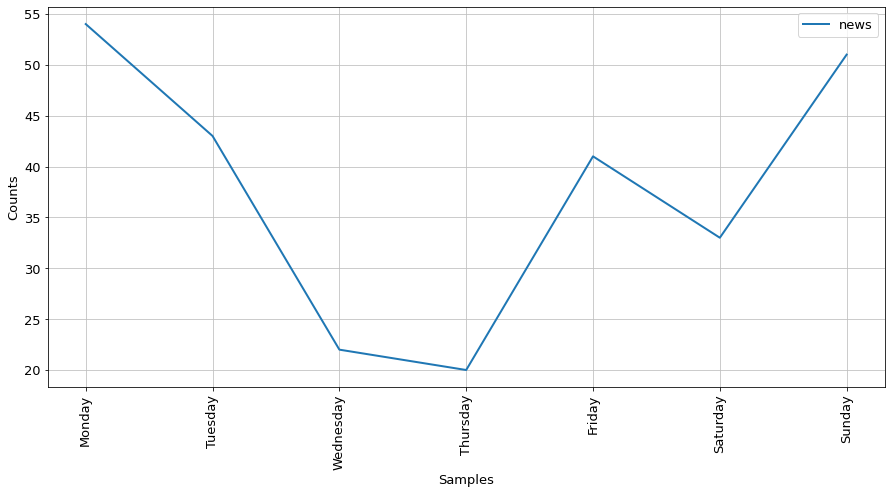

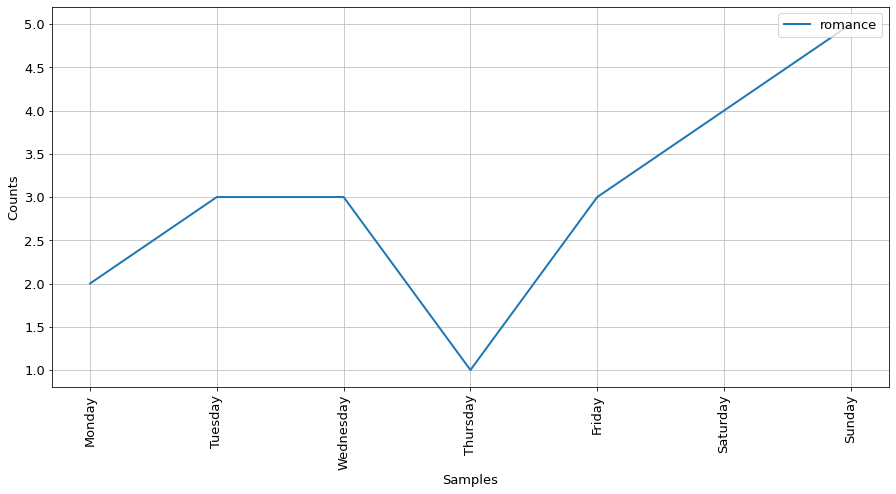

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
genres = ["news", "romance"]
wkdays = "Monday Tuesday Wednesday Thursday Friday Saturday Sunday" \
    .split()
cfd_wkday = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in genres
    for word  in brown.words(categories=genre)
    for wkday in wkdays
    if word == wkday
)
cfd_wkday.tabulate()
cfd_wkday.plot(samples = wkdays, conditions = ["news"])
cfd_wkday.plot(samples = wkdays, conditions = ["romance"])

# 2.4 Generating Random Text with Bigrams

In [27]:
bigrams = nltk.bigrams(brown.words(categories="religion"))
cfd_bgr = nltk.ConditionalFreqDist(bigrams)

def generate_model(cfdist, word, num=15):
    for i in range(num):
        print(word, end=" ")
        word = cfdist[word].max()

generate_model(cfd_bgr, "a", 80)

a man , and the world . The new members of the world . The new members of the world . The new members of the world . The new members of the world . The new members of the world . The new members of the world . The new members of the world . The new members of the world . The new members of the world . The new members of the world . The new members 

# 4.1 Wordlist corpora

In [28]:
unx_words = nltk.corpus.PlaintextCorpusReader("/usr/share/dict/", "words").words()

def unusual_vocab(word_list):
    
    alpha = [w.lower() for w in word_list if w.isalpha()]
    vocab = [w.lower() for w in nltk.corpus.words.words()]
    
    return sorted(set(vocab) - set(alpha))

unusual_vocab(unx_words)

['aa',
 'aal',
 'aalii',
 'aam',
 'aani',
 'aardwolf',
 'aaronic',
 'aaronical',
 'aaronite',
 'aaronitic',
 'aaru',
 'ab',
 'aba',
 'ababdeh',
 'ababua',
 'abac',
 'abaca',
 'abacate',
 'abacay',
 'abacinate',
 'abacination',
 'abaciscus',
 'abacist',
 'abactinal',
 'abactinally',
 'abaction',
 'abactor',
 'abaculus',
 'abadite',
 'abaff',
 'abaisance',
 'abaiser',
 'abaissed',
 'abalienate',
 'abalienation',
 'abama',
 'abampere',
 'abandonable',
 'abandonedly',
 'abandonee',
 'abandoner',
 'abanic',
 'abantes',
 'abaptiston',
 'abarambo',
 'abaris',
 'abarthrosis',
 'abarticular',
 'abarticulation',
 'abas',
 'abasedly',
 'abasedness',
 'abaser',
 'abasgi',
 'abashedly',
 'abashedness',
 'abashless',
 'abashlessly',
 'abashment',
 'abasia',
 'abasic',
 'abask',
 'abassin',
 'abastardize',
 'abatable',
 'abater',
 'abatis',
 'abatised',
 'abaton',
 'abator',
 'abatua',
 'abature',
 'abave',
 'abaxial',
 'abaxile',
 'abaze',
 'abb',
 'abba',
 'abbacomes',
 'abbacy',
 'abbadide',
 'abb

## Stop words

In [29]:
sw_en = nltk.corpus.stopwords.words("english")

def content_fraction(word_list):
    
    len_text = len(word_list)
    len_cont = len([w for w in word_list if not w.lower() in sw_en])
    
    return len_cont / len_text

content_fraction(nltk.corpus.reuters.words())

0.735240435097661

## Puzzle

E G I V R V O N L

Find words that combine these letters:

- 6 letters or longer
- R must be present
- At least one 9-letter word

In [30]:
pzl_letters = nltk.FreqDist("egivrvonl")
pzl_oblig = "r"
word_list = nltk.corpus.words.words()

[
    w for w in word_list
    if len(w) >= 6
    and pzl_oblig in w
    and nltk.FreqDist(w) <= pzl_letters
]

['glover',
 'gorlin',
 'govern',
 'grovel',
 'ignore',
 'involver',
 'lienor',
 'linger',
 'longer',
 'lovering',
 'noiler',
 'overling',
 'region',
 'renvoi',
 'revolving',
 'ringle',
 'roving',
 'violer',
 'virole']

## Last letter in male and female names

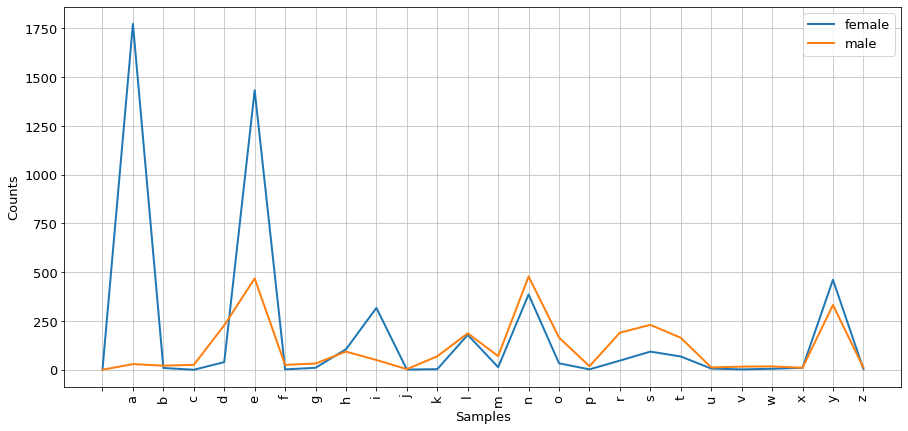

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [42]:
cfd_names = nltk.ConditionalFreqDist(
    (gender, name[-1])
    for gender in ["female", "male"]
    for name in nltk.corpus.names.words(gender + ".txt")
)

cfd_names.plot()

# 4.2 A pronouncing dictionary

In the CMU dictionary, each entry is a tuple whose first element is the word and the second element is a list of phones.

In [44]:
entries = nltk.corpus.cmudict.entries()

entries[42371:42379]

[('fir', ['F', 'ER1']),
 ('fire', ['F', 'AY1', 'ER0']),
 ('fire', ['F', 'AY1', 'R']),
 ('firearm', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M']),
 ('firearm', ['F', 'AY1', 'R', 'AA2', 'R', 'M']),
 ('firearms', ['F', 'AY1', 'ER0', 'AA2', 'R', 'M', 'Z']),
 ('firearms', ['F', 'AY1', 'R', 'AA2', 'R', 'M', 'Z']),
 ('fireball', ['F', 'AY1', 'ER0', 'B', 'AO2', 'L'])]

## Words that end with a sound like "nicks"

In [47]:
syl = ["N", "IH0", "K", "S"]
[e for e,p in entries if p[-4:] == syl]

["atlantic's",
 'audiotronics',
 'avionics',
 'beatniks',
 'calisthenics',
 'centronics',
 'chamonix',
 'chetniks',
 "clinic's",
 'clinics',
 'conics',
 'conics',
 'cryogenics',
 'cynics',
 'diasonics',
 "dominic's",
 'ebonics',
 'electronics',
 "electronics'",
 "endotronics'",
 'endotronics',
 'enix',
 'environics',
 'ethnics',
 'eugenics',
 'fibronics',
 'flextronics',
 'harmonics',
 'hispanics',
 'histrionics',
 'identics',
 'ionics',
 'kibbutzniks',
 'lasersonics',
 'lumonics',
 'mannix',
 'mechanics',
 "mechanics'",
 'microelectronics',
 'minix',
 'minnix',
 'mnemonics',
 'mnemonics',
 'molonicks',
 'mullenix',
 'mullenix',
 'mullinix',
 'mulnix',
 "munich's",
 'nucleonics',
 'onyx',
 'organics',
 "panic's",
 'panics',
 'penix',
 'pennix',
 'personics',
 'phenix',
 "philharmonic's",
 'phoenix',
 'phonics',
 'photronics',
 'pinnix',
 'plantronics',
 'pyrotechnics',
 'refuseniks',
 "resnick's",
 'respironics',
 'sconnix',
 'siliconix',
 'skolniks',
 'sonics',
 'sputniks',
 'technics

## Explain this piece of code

In [48]:
[w for w,p in entries if p[-1] == 'M' and w[-1] == 'n']

['autumn', 'column', 'condemn', 'damn', 'goddamn', 'hymn', 'solemn']

This extracts the words with "M" as its last phone and "n" as its last letter.

In [49]:
sorted(set(w[:2]
           for w, pron in entries
           if pron[0] == 'N'
           and w[0] != 'n'))

['gn', 'kn', 'mn', 'pn']

This extracts the first two letters which produce a first phone "N" but whose first letter is not "n".

## Extract stresses from phone lists

In [55]:
def stress(phone_list):
    return [c for p in phone_list for c in p if c.isdigit()]

[w for w,p in entries if stress(p) == ["0", "1", "0", "2"]]

['abbreviate',
 'abbreviates',
 'accelerate',
 'accelerates',
 'accessorize',
 'accessorized',
 'accommodate',
 'accommodates',
 'accumulate',
 'accumulates',
 'acetochlor',
 'acetylene',
 'acidified',
 'acidifies',
 'acidify',
 'acyclovir',
 'adagio',
 'adaptaplex',
 'adenoscan',
 'adenosine',
 'adjudicate',
 'administrate',
 'adulterate',
 'adulterates',
 'affiliate',
 "affiliate's",
 'affiliates',
 'afghanistan',
 "afghanistan's",
 'afghanistans',
 'agglomerate',
 'agglutinate',
 'alleviate',
 'alternacare',
 'aluminize',
 'aluminized',
 'alveoli',
 'amagansett',
 'amalgamate',
 'amalgamates',
 'ameliorate',
 'ameribanc',
 'americar',
 'americare',
 'americares',
 "americas'",
 'americold',
 'americorp',
 'americorp',
 'americorps',
 'amerigas',
 'amerihost',
 'ameritech',
 "ameritech's",
 'ameritrust',
 'amiprilose',
 'amnesiac',
 'amphetamine',
 'amphetamines',
 'anafranil',
 'analyses',
 'annihilate',
 'antagonize',
 'antagonized',
 'anticipate',
 'anticipates',
 "antigone's",
 '

## Extract words with similar phones

In [60]:
cfd_ph = nltk.ConditionalFreqDist(
    (pron[0]+"-"+pron[2], word)
    for word, pron in entries
    if word[0] == "p"
    and len(pron) == 3
)

list(cfd_ph)

['P-P',
 'P-R',
 'P-SH',
 'P-K',
 'P-S',
 'P-D',
 'P-TH',
 'P-F',
 'P-JH',
 'P-L',
 'P-IY0',
 'P-N',
 'P-Z',
 'P-T',
 'P-M',
 'P-NG',
 'P-CH',
 'P-V',
 'P-ER0',
 'P-ER1',
 'P-G',
 'P-AH0',
 'P-OW0',
 'P-OW1',
 'P-UW1',
 'F-F',
 'F-L',
 'F-R',
 'F-M',
 'F-N',
 'F-Z',
 'F-UW1',
 'F-IY0',
 'F-NG',
 'F-T',
 'P-AA1',
 'P-EY1',
 'P-IY1',
 'P-AW1',
 'P-OY1',
 'P-AY1',
 'S-M',
 'S-K',
 'T-K',
 'P-B']

# 5.1 Senses and synonyms

The `synsets("word")` mehtod returns a list of synonom sets ("synsets") that the "word" belongs to.

Synsets have a methods to get the synonyms (lemmas) or definitions.

In [67]:
from nltk.corpus import wordnet as wn
wn.synsets("motorcar")[0].lemma_names()

['car', 'auto', 'automobile', 'machine', 'motorcar']

In [68]:
wn.synsets("motorcar")[0].definition()

'a motor vehicle with four wheels; usually propelled by an internal combustion engine'

In [69]:
wn.synset("car.n.01").examples()

['he needs a car to get to work']

In [70]:
wn.synset("car.n.01").lemmas()

[Lemma('car.n.01.car'),
 Lemma('car.n.01.auto'),
 Lemma('car.n.01.automobile'),
 Lemma('car.n.01.machine'),
 Lemma('car.n.01.motorcar')]

## 5.2 The WordNet hierarchy

Finding hyponyms (or hypernyms) of synsets.

In [73]:
synset_motorcar = wn.synset("car.n.01")
sorted(
    lemma.name()
    for synset in synset_motorcar.hyponyms()
    for lemma  in synset.lemmas()
)

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

### *Side experiment `lemma_names()`*

Using `lemma_names()` for each hyponym will return a list of lists.

In [76]:
sorted(
    l
    for s in synset_motorcar.hyponyms()
    for l in s.lemma_names()
)

['Model_T',
 'S.U.V.',
 'SUV',
 'Stanley_Steamer',
 'ambulance',
 'beach_waggon',
 'beach_wagon',
 'bus',
 'cab',
 'compact',
 'compact_car',
 'convertible',
 'coupe',
 'cruiser',
 'electric',
 'electric_automobile',
 'electric_car',
 'estate_car',
 'gas_guzzler',
 'hack',
 'hardtop',
 'hatchback',
 'heap',
 'horseless_carriage',
 'hot-rod',
 'hot_rod',
 'jalopy',
 'jeep',
 'landrover',
 'limo',
 'limousine',
 'loaner',
 'minicar',
 'minivan',
 'pace_car',
 'patrol_car',
 'phaeton',
 'police_car',
 'police_cruiser',
 'prowl_car',
 'race_car',
 'racer',
 'racing_car',
 'roadster',
 'runabout',
 'saloon',
 'secondhand_car',
 'sedan',
 'sport_car',
 'sport_utility',
 'sport_utility_vehicle',
 'sports_car',
 'squad_car',
 'station_waggon',
 'station_wagon',
 'stock_car',
 'subcompact',
 'subcompact_car',
 'taxi',
 'taxicab',
 'tourer',
 'touring_car',
 'two-seater',
 'used-car',
 'waggon',
 'wagon']

## Root hypernym

In [81]:
synset_motorcar.root_hypernyms()

[Synset('entity.n.01')]

# 5.3 More lexical relations

## Component (meronym) and container (holonym)

In [86]:
[
    wn.synset("tree.n.01").part_meronyms(),
    wn.synset("tree.n.01").substance_meronyms(),
    wn.synset("tree.n.01").member_holonyms()
]

[[Synset('burl.n.02'),
  Synset('crown.n.07'),
  Synset('limb.n.02'),
  Synset('stump.n.01'),
  Synset('trunk.n.01')],
 [Synset('heartwood.n.01'), Synset('sapwood.n.01')],
 [Synset('forest.n.01')]]

## Verb entailment

In [87]:
wn.synset("tease.v.03").entailments()

[Synset('arouse.v.07'), Synset('disappoint.v.01')]

## Antonymy between lemmas

In [93]:
[
    wn.lemma("rush.v.01.rush").antonyms(),
    wn.lemma('horizontal.a.01.horizontal').antonyms(),
    wn.lemma("staccato.r.01.staccato").antonyms()
]

[[Lemma('linger.v.04.linger')],
 [Lemma('vertical.a.01.vertical'), Lemma('inclined.a.02.inclined')],
 [Lemma('legato.r.01.legato')]]

# 5.4 Semantic similarity 

In [95]:
right    = wn.synset("right_whale.n.01")
orca     = wn.synset("orca.n.01")
minke    = wn.synset("minke_whale.n.01")
tortoise = wn.synset("tortoise.n.01")
novel    = wn.synset("novel.n.01")

In [109]:
right_hypernyms = [
    right.lowest_common_hypernyms(minke),
    right.lowest_common_hypernyms(orca),
    right.lowest_common_hypernyms(tortoise),
    right.lowest_common_hypernyms(novel)
]

list(map(
    
    lambda s: 
        (right.lowest_common_hypernyms(s),
         right.lowest_common_hypernyms(s)[0].min_depth(),
         right.path_similarity(s)),
    
    [minke, orca, tortoise, novel]
    
))

[([Synset('baleen_whale.n.01')], 14, 0.25),
 ([Synset('whale.n.02')], 13, 0.16666666666666666),
 ([Synset('vertebrate.n.01')], 8, 0.07692307692307693),
 ([Synset('entity.n.01')], 0, 0.043478260869565216)]